In [202]:
import matplotlib.pyplot as plt
import skimage
import imageio
import cv2
import numpy as np

### Read and Display

In [203]:
image_1 = imageio.imread_v2("./images/image-35.jpg")
image_1_mask = plt.imread("./images/mask-35.png")

image_dir = [ "./images/image-35.jpg", "./images/image-83.jpg", "./images/image-110.jpg" ]
mask_dir = [ "./images/mask-35.png", "./images/mask-83.png", "./images/mask-110.png" ]

names = ["image-35", "image-83", "image-110"]
images = []
masks = []

for i in range(3):
    images.append(cv2.imread(image_dir[i]))
    masks.append(cv2.imread(mask_dir[i]))

    # Convert BGR to RGB
    images[i] = images[i][:,:,[2, 1, 0]]
    masks[i] = masks[i][:,:,[2, 1, 0]]

    # turn mask into a usable mask
    masks[i] = (masks[i] / 255).astype(np.uint8)

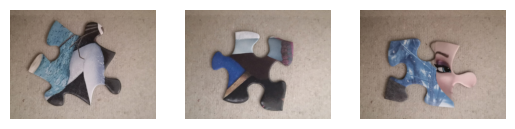

In [204]:
fig = plt.figure()
for i in range(3):
    fig.add_subplot(1, 3, i + 1)
    plt.imshow(images[i])
    plt.axis('off')

plt.show()

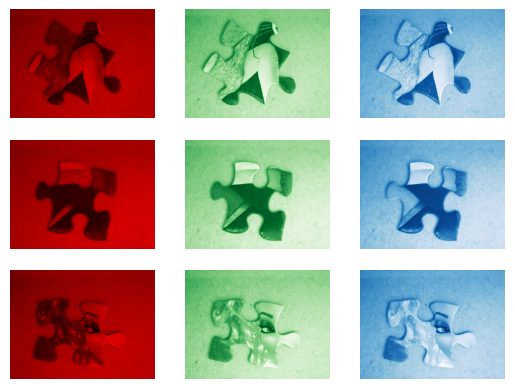

In [223]:
fig = plt.figure()
for i in range(3):
    fig.add_subplot(3, 3, i * 3 + 1)
    channel = np.zeros_like(images[i])
    channel[:,:,0] = images[i][:,:,0]
    plt.imshow(channel)
    plt.axis('off')

    fig.add_subplot(3, 3, i * 3 + 2)
    channel = np.zeros_like(images[i])
    channel[:,:,1] = images[i][:,:,1]
    plt.imshow(channel)
    plt.axis('off')

    fig.add_subplot(3, 3, i * 3 + 3)
    channel = np.zeros_like(images[i])
    channel[:,:,2] = images[i][:,:,2]
    plt.imshow(channel)
    plt.axis('off')

plt.show()

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...


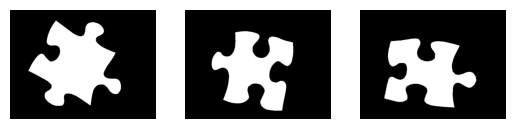

In [219]:
fig = plt.figure()
for i in range(3):
    fig.add_subplot(1, 3, i + 1)
    plt.imshow(masks[i] * 255)
    plt.axis('off')

plt.show()

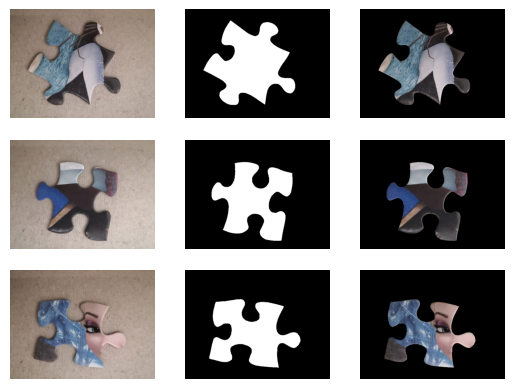

In [207]:
fig = plt.figure()
for i in range(3):
    fig.add_subplot(3, 3, i * 3 + 1)
    plt.imshow(images[i], cmap=plt.cm.Reds_r)
    plt.axis('off')

    fig.add_subplot(3, 3, i * 3 + 2)
    plt.imshow(masks[i] * 255, cmap=plt.cm.Greens_r)
    plt.axis('off')

    fig.add_subplot(3, 3, i * 3 + 3)
    plt.imshow((images[i] * masks[i]).astype(np.uint8), cmap=plt.cm.Blues_r)
    plt.axis('off')

plt.show()

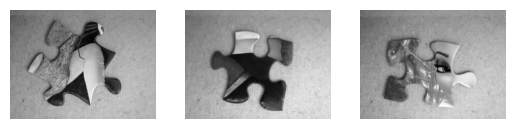

In [214]:
grayscale_images = []
for i in range(3):
    grayscale_images.append(skimage.color.rgb2gray(images[i]))

fig = plt.figure()
for i in range(3):
    fig.add_subplot(1, 3, i + 1)
    plt.imshow(grayscale_images[i], cmap="gray")
    plt.axis('off')

plt.show()

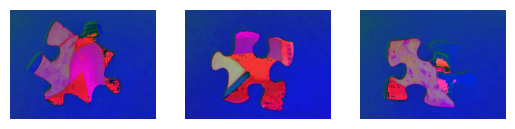

In [215]:
hsv_images = []
for i in range(3):
    hsv_images.append(skimage.color.rgb2hsv(images[i]))

fig = plt.figure()
for i in range(3):
    fig.add_subplot(1, 3, i + 1)
    plt.imshow(hsv_images[i])
    plt.axis('off')

plt.show()

### Descriptive States

In [209]:
for i, im in enumerate(images):
    print(f"{names[i]} dimensions (w,h) = ({im.shape[1]}, {im.shape[0]})")


image-35 dimensions (w,h) = (600, 450)
image-83 dimensions (w,h) = (600, 450)
image-110 dimensions (w,h) = (600, 450)


In [210]:
for i, mk in enumerate(masks):
    print(f"{names[i]} mask white pixel count = {(mk[mk[:,:] == [255, 255, 255]]).shape[0]}")

image-35 mask white pixel count = 0
image-83 mask white pixel count = 0
image-110 mask white pixel count = 0


In [218]:
for i in range(3):
    max_value = np.max(grayscale_images[i][:,:])
    print(f"{names[i]} max grayscale pixel value = {max_value}")


image-35 max grayscale value = 0.8985443137254902
image-83 max grayscale value = 0.8971980392156863
image-110 max grayscale value = 0.8501392156862745


In [221]:
for i in range(3):
    max_puzzle_value = np.max(grayscale_images[i] * masks[i][:,:,0])
    print(f"{names[i]} max grayscale puzzle pixel value = {max_puzzle_value}")

image-35 max grayscale puzzle pixel value = 0.8985443137254902
image-83 max grayscale puzzle pixel value = 0.8971980392156863
image-110 max grayscale puzzle pixel value = 0.8501392156862745


In [213]:
for i in range(3):
    mean_red_intensity = np.mean(masked_images[i][:,:,0])
    mean_green_intensity = np.mean(masked_images[i][:,:,1])
    mean_blue_intensity = np.mean(masked_images[i][:,:,2])

    print(f"{names[i]} mean red pixel intensity = {mean_red_intensity}")
    print(f"{names[i]} mean green pixel intensity = {mean_green_intensity}")
    print(f"{names[i]} mean blue pixel intensity = {mean_blue_intensity}\n")

image-35 mean red pixel intensity = 29.35978888888889
image-35 mean green pixel intensity = 30.739314814814815
image-35 mean blue pixel intensity = 33.088374074074075

image-83 mean red pixel intensity = 18.052877777777777
image-83 mean green pixel intensity = 17.75172962962963
image-83 mean blue pixel intensity = 20.230914814814813

image-110 mean red pixel intensity = 25.74955925925926
image-110 mean green pixel intensity = 25.755525925925927
image-110 mean blue pixel intensity = 29.07501111111111

